In [1]:
from IPython.display import display, HTML
display(HTML("<style>div.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import tensorflow as tf                            # tensorflow 기본 import
from tensorflow.keras.models import Sequential     # model box 구성
from tensorflow.keras.layers import Flatten, Dense # model 안의 input layer와 output layer를 구성
from tensorflow.keras.optimizers import SGD        # 알고리즘 담당
from sklearn.model_selection import train_test_split # train Data,Test Data 분리
from sklearn.preprocessing import MinMaxScaler     # 데이터 정규화
# 컴퓨터는 큰 숫를 작은 수로
# 변경 0~1 사이 실수 값으로 변경



KeyboardInterrupt: 

In [ ]:
(x_train,y_train),(X_test,Y_test)=\
    tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

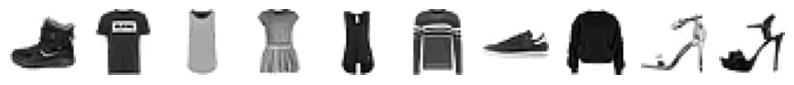

In [ ]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(1,10,figsize=(10,10))

for i in range(10):
    axs[i].imshow(x_train[i],cmap='gray_r')
    axs[i].axis('off')
plt.show()

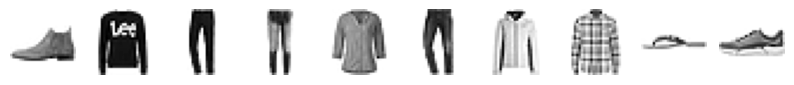

In [ ]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(1,10,figsize=(10,10))

for i in range(10):
    axs[i].imshow(X_test[i],cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [ ]:
print([y_train[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [ ]:
import numpy as np
print(np.unique(y_train,return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))


In [ ]:
norm_x_train = x_train/255 #MinMaxScale
norm_X_test = X_test/255

In [ ]:
norm_x_train.shape

(60000, 28, 28)

In [ ]:
norm_X_test.shape

(10000, 28, 28)

In [ ]:
norm_x_train = norm_x_train.reshape(-1,28*28)
norm_X_test = norm_X_test.reshape(-1,28*28)


In [ ]:
norm_x_train.shape

(60000, 784)

In [ ]:
norm_X_test.shape

(10000, 784)

In [ ]:
model = Sequential()

In [ ]:
model.add(Flatten(input_shape=(28*28,)))

model.add(Dense(units=10,activation="softmax"))

In [ ]:
model.compile(optimizer=SGD(learning_rate=0.001),
              loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(norm_x_train,
         y_train,
         epochs=100,
         verbose=1,
         validation_split=0.2)

Epoch 1/100
1500/1500 [==============================] - 5s 3ms/step - loss: 1.5314 - accuracy: 0.5673 - val_loss: 1.1630 - val_accuracy: 0.6758
Epoch 2/100
1500/1500 [==============================] - 3s 2ms/step - loss: 1.0474 - accuracy: 0.6897 - val_loss: 0.9479 - val_accuracy: 0.7126
Epoch 3/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.9051 - accuracy: 0.7174 - val_loss: 0.8528 - val_accuracy: 0.7336
Epoch 4/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8309 - accuracy: 0.7391 - val_loss: 0.7960 - val_accuracy: 0.7492
Epoch 5/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7827 - accuracy: 0.7530 - val_loss: 0.7559 - val_accuracy: 0.7613
Epoch 6/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7478 - accuracy: 0.7639 - val_loss: 0.7262 - val_accuracy: 0.7673
Epoch 7/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7207 - accuracy: 0.7710 - val_loss: 0.7030 - val_ac

In [ ]:
norm_X_test.shape

(10000, 784)

In [ ]:
norm_X_test.reshape(-1,28*28)
norm_X_test.shape

(10000, 784)

In [ ]:
model.evaluate(norm_X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4951 - accuracy: 0.8301


[0.4950650930404663, 0.8300999999046326]

In [ ]:
model2 = Sequential()

In [ ]:
model2.add(Flatten(input_shape=(28*28,)))
model2.add(Dense(units=256, activation='sigmoid'))
model2.add(Dense(units=10, activation='softmax'))

In [ ]:
model2.compile(optimizer=SGD(learning_rate=0.001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist2 = model2.fit(norm_x_train,
         y_train,
         epochs=100,
         verbose=1,
         validation_split=0.2)

Epoch 1/100
1500/1500 [==============================] - 8s 3ms/step - loss: 2.0867 - accuracy: 0.4558 - val_loss: 1.8887 - val_accuracy: 0.6117
Epoch 2/100
1500/1500 [==============================] - 4s 3ms/step - loss: 1.7414 - accuracy: 0.6363 - val_loss: 1.6005 - val_accuracy: 0.6716
Epoch 3/100
1500/1500 [==============================] - 4s 3ms/step - loss: 1.4988 - accuracy: 0.6721 - val_loss: 1.3961 - val_accuracy: 0.6933
Epoch 4/100
1500/1500 [==============================] - 4s 3ms/step - loss: 1.3266 - accuracy: 0.6933 - val_loss: 1.2505 - val_accuracy: 0.7073
Epoch 5/100
1500/1500 [==============================] - 4s 3ms/step - loss: 1.2022 - accuracy: 0.7059 - val_loss: 1.1433 - val_accuracy: 0.7136
Epoch 6/100
1500/1500 [==============================] - 4s 3ms/step - loss: 1.1096 - accuracy: 0.7148 - val_loss: 1.0622 - val_accuracy: 0.7169
Epoch 7/100
1500/1500 [==============================] - 4s 3ms/step - loss: 1.0386 - accuracy: 0.7210 - val_loss: 0.9994 - val_ac

In [ ]:
model2.evaluate(norm_X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5177 - accuracy: 0.8167


[0.5177412629127502, 0.8166999816894531]

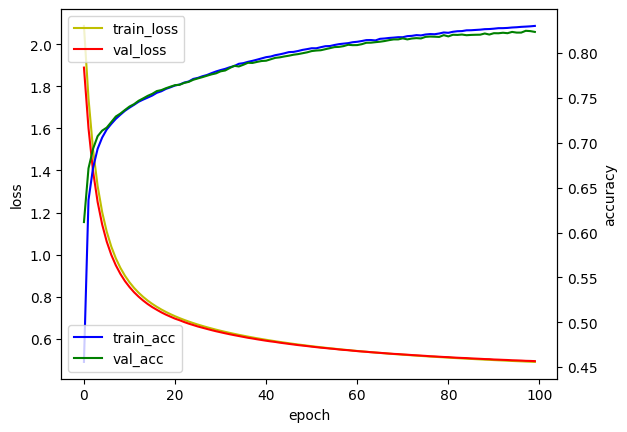

In [ ]:
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots()
loss_ax.plot(hist2.history["loss"], "y", label="train_loss")
loss_ax.plot(hist2.history["val_loss"], "r", label="val_loss")
loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")
loss_ax.legend(loc="upper left")
acc_ax = loss_ax.twinx()
acc_ax.plot(hist2.history["accuracy"], "b", label="train_acc")
acc_ax.plot(hist2.history["val_accuracy"], "g", label="val_acc")
acc_ax.set_ylabel("accuracy")
acc_ax.legend(loc="lower left")